<a href="https://colab.research.google.com/github/madan-raj-s/demo_fork/blob/master/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Setting a default seaborn setting in plots
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
# Input data files are available in the read-only "../input/" directory
#For example, running this (by clicking run or pressing Shift+Enter) will
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
      print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('cars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.shape

(32, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
df.isnull().mean()

,0
model,0.0
mpg,0.0
cyl,0.0
disp,0.0
hp,0.0
drat,0.0
wt,0.0
qsec,0.0
vs,0.0
am,0.0


In [ ]:
df.describe(include='all')

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mazda RX4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,NaN,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,NaN,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,NaN,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,NaN,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,NaN,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000


In [ ]:
print(df['model'].unique())
print(df['mpg'].unique())
print(df['cyl'].unique())
print(df['disp'].unique())

['Mazda RX4' 'Mazda RX4 Wag' 'Datsun 710' 'Hornet 4 Drive'
 'Hornet Sportabout' 'Valiant' 'Duster 360' 'Merc 240D' 'Merc 230'
 'Merc 280' 'Merc 280C' 'Merc 450SE' 'Merc 450SL' 'Merc 450SLC'
 'Cadillac Fleetwood' 'Lincoln Continental' 'Chrysler Imperial' 'Fiat 128'
 'Honda Civic' 'Toyota Corolla' 'Toyota Corona' 'Dodge Challenger'
 'AMC Javelin' 'Camaro Z28' 'Pontiac Firebird' 'Fiat X1-9' 'Porsche 914-2'
 'Lotus Europa' 'Ford Pantera L' 'Ferrari Dino' 'Maserati Bora'
 'Volvo 142E']
[21.  22.8 21.4 18.7 18.1 14.3 24.4 19.2 17.8 16.4 17.3 15.2 10.4 14.7
 32.4 30.4 33.9 21.5 15.5 13.3 27.3 26.  15.8 19.7 15. ]
[6 4 8]
[160.  108.  258.  360.  225.  146.7 140.8 167.6 275.8 472.  460.  440.
  78.7  75.7  71.1 120.1 318.  304.  350.  400.   79.  120.3  95.1 351.
 145.  301.  121. ]


/tmp/ipython-input-1284750155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.drat)


<Axes: xlabel='drat', ylabel='Density'>

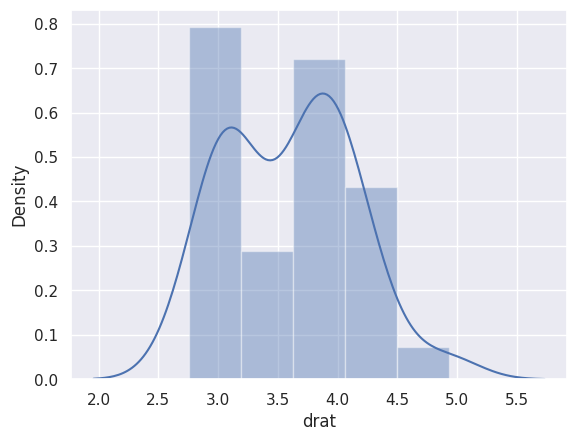

In [ ]:
sns.distplot(df.drat)

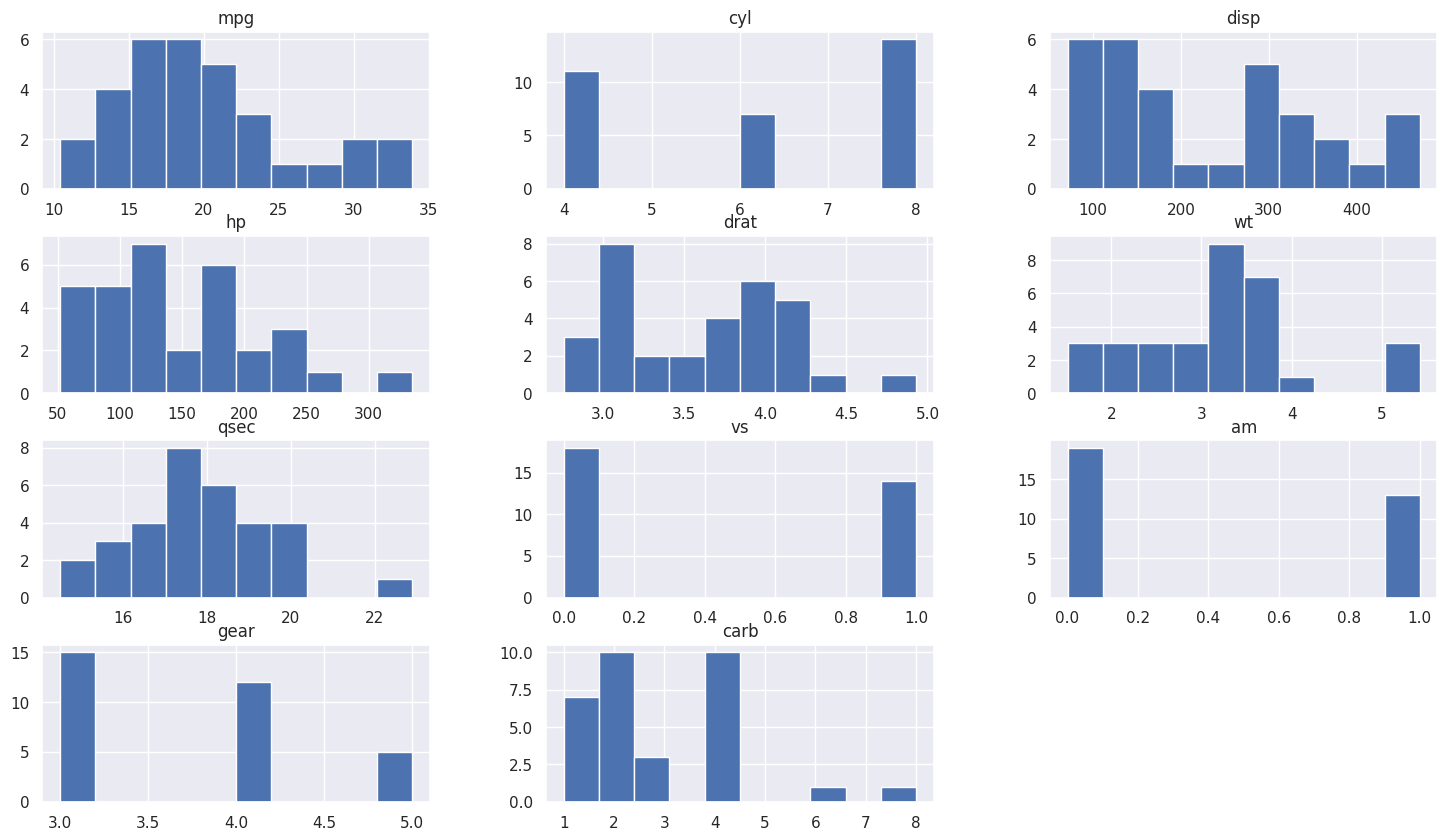

In [ ]:
fig = df.hist(figsize=(18,10))

<Axes: xlabel='model', ylabel='drat'>

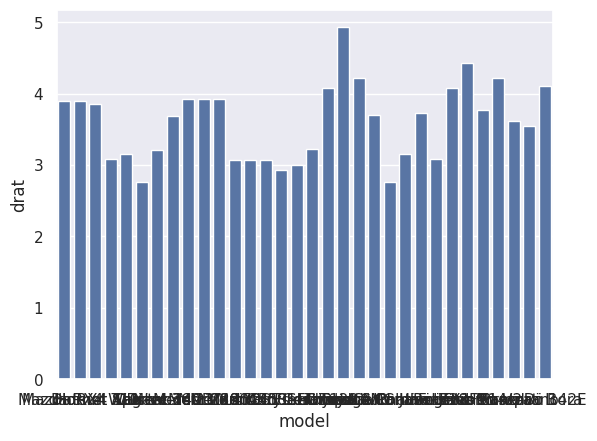

In [ ]:
sns.barplot(x='model', y='drat',data=df)

<Axes: xlabel='drat', ylabel='model'>

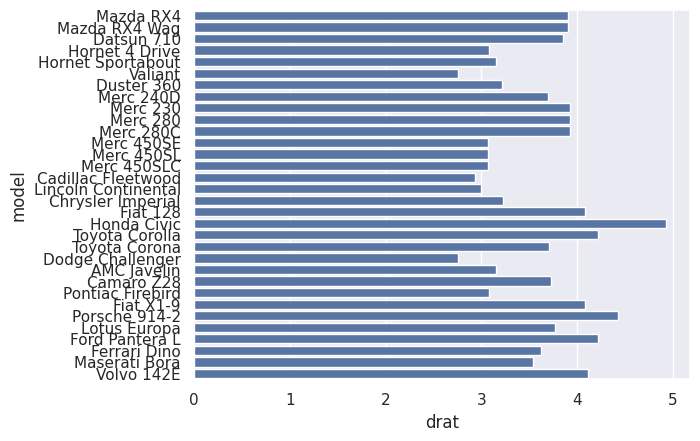

In [ ]:
sns.barplot(x='drat', y='model',data=df)

<Axes: xlabel='drat', ylabel='hp'>

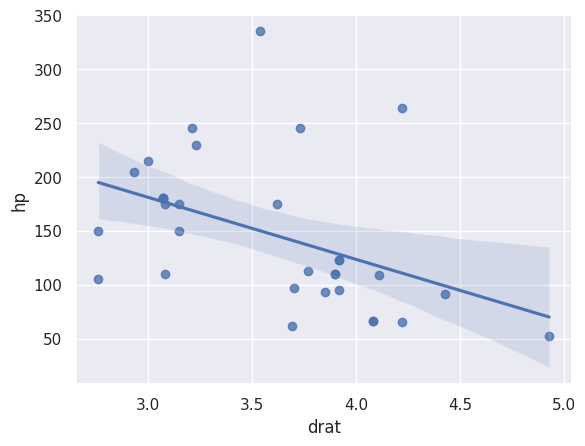

In [ ]:
sns.regplot(x='drat', y='hp',data=df)

<Axes: xlabel='drat', ylabel='hp'>

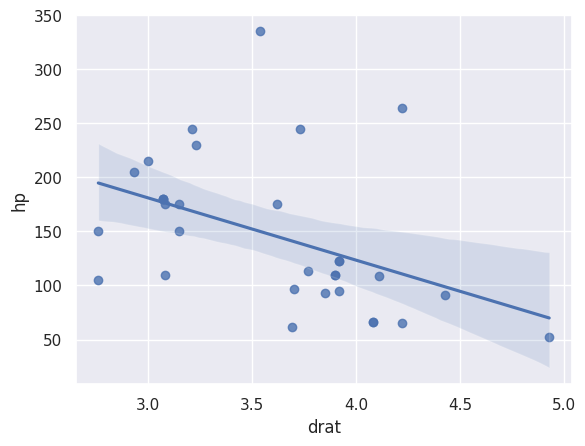

In [ ]:
sns.regplot(x='drat', y='hp',data=df)

<Axes: xlabel='model', ylabel='hp'>

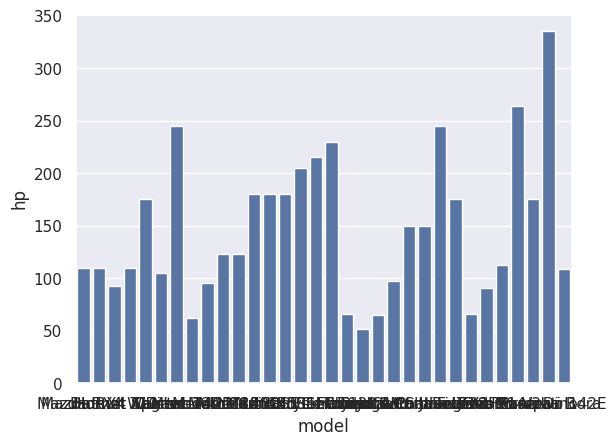

In [ ]:
sns.barplot(x='model', y='hp',data=df)

/tmp/ipython-input-3030543259.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hp', y='model',data=df,palette='rainbow')


<Axes: xlabel='hp', ylabel='model'>

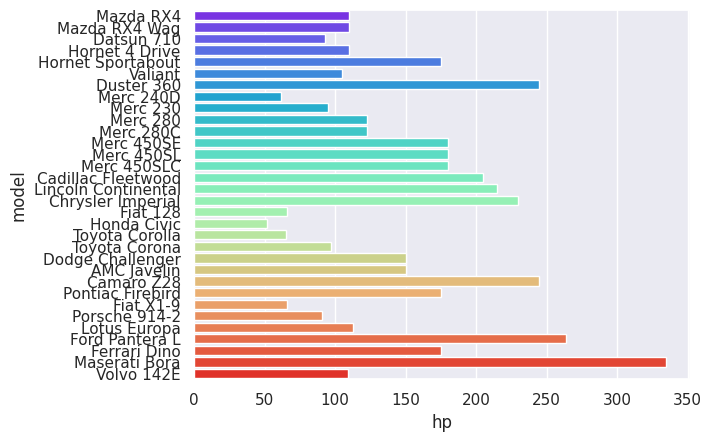

In [ ]:
sns.barplot(x='hp', y='model',data=df,palette='rainbow')